In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [6]:
# ƒê·ªçc d·ªØ li·ªáu (robust Windows path using pathlib to avoid unicodeescape errors)
from pathlib import Path
data_path = Path(r'D:\PTDL\LAB1_PTDL\xu_ly_truc_quan_hoa_du_lieu\bai_thuc_hanh_2\Mua_sam\data\Online Retail.csv')
if not data_path.exists():
    raise FileNotFoundError(f'CSV file not found at: {data_path} - check the path or the data folder')
# Use pandas to read the CSV (explicit path object is fine)
df = pd.read_csv(data_path)
print('Loaded', len(df), 'rows; columns:', list(df.columns))
df.head()

Loaded 541909 rows; columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010 08:26:00       2.55     17850.0  United Kingdom  
1  12/01/2010 08:26:00       3.39     17850.0  United Kingdom  
2  12/01/2010 08:26:00       2.75     17850.0  United Kingdom  
3  12/01/2010 08:26:00       3.39     17850.0  United Kingdom  
4  12/01/2010 08:26:00       3.39     17850.0  United Kingdom

# 1. T·ªîNG QUAN D·ªÆ LI·ªÜU

In [10]:
print("=" * 50)
print("T·ªîNG QUAN D·ªÆ LI·ªÜU")
print("=" * 50)
print(f"K√≠ch th∆∞·ªõc dataset: {df.shape}")
print(f"S·ªë d√≤ng: {df.shape[0]}")
print(f"S·ªë c·ªôt: {df.shape[1]}")
print("\nTh√¥ng tin c√°c c·ªôt:")
print(df.info())
print("\n5 d√≤ng ƒë·∫ßu:")
print(df.head())
print("\n5 d√≤ng cu·ªëi:")
print(df.tail())

T·ªîNG QUAN D·ªÆ LI·ªÜU
K√≠ch th∆∞·ªõc dataset: (541909, 8)
S·ªë d√≤ng: 541909
S·ªë c·ªôt: 8

Th√¥ng tin c√°c c·ªôt:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

5 d√≤ng ƒë·∫ßu:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HE

# 2. TH·ªêNG K√ä M√î T·∫¢

In [11]:
print("\n" + "=" * 50)
print("TH·ªêNG K√ä M√î T·∫¢")
print("=" * 50)
print(df.describe())


TH·ªêNG K√ä M√î T·∫¢
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# 3. KI·ªÇM TRA D·ªÆ LI·ªÜU THI·∫æU

In [12]:
print("\n" + "=" * 50)
print("KI·ªÇM TRA D·ªÆ LI·ªÜU THI·∫æU")
print("=" * 50)
missing_data = df.isnull().sum()
print("D·ªØ li·ªáu thi·∫øu:")
print(missing_data[missing_data > 0])


KI·ªÇM TRA D·ªÆ LI·ªÜU THI·∫æU
D·ªØ li·ªáu thi·∫øu:
Description      1454
CustomerID     135080
dtype: int64


# 4. PH√ÇN T√çCH C√ÅC BI·∫æN QUAN TR·ªåNG

In [13]:
# Chuy·ªÉn ƒë·ªïi InvoiceDate sang datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## TR·ª∞C QUAN H√ìA V·ªöI MATPLOTLIB

In [14]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

### Bi·ªÉu ƒë·ªì 1: Ph√¢n b·ªë Quantity

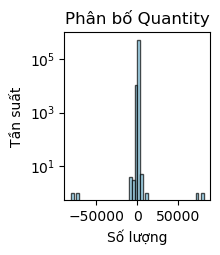

In [15]:
plt.subplot(2, 3, 1)
plt.hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Ph√¢n b·ªë Quantity')
plt.xlabel('S·ªë l∆∞·ª£ng')
plt.ylabel('T·∫ßn su·∫•t')
plt.yscale('log')  # D√πng log scale do c√≥ outliers

### Bi·ªÉu ƒë·ªì 2: Ph√¢n b·ªë UnitPrice

Text(0, 0.5, 'T·∫ßn su·∫•t')

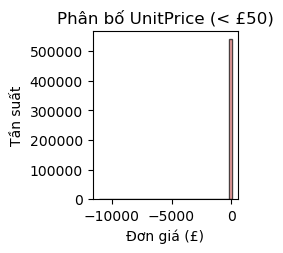

In [16]:
plt.subplot(2, 3, 2)
plt.hist(df[df['UnitPrice'] < 50]['UnitPrice'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Ph√¢n b·ªë UnitPrice (< ¬£50)')
plt.xlabel('ƒê∆°n gi√° (¬£)')
plt.ylabel('T·∫ßn su·∫•t')


### Bi·ªÉu ƒë·ªì 3: Ph√¢n b·ªë qu·ªëc gia

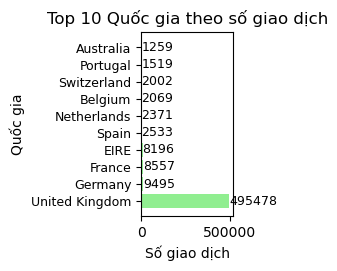

In [27]:
plt.subplot(2, 3, 6)
country_counts = df['Country'].value_counts().head(10)

# D√πng bi·ªÉu ƒë·ªì ngang ƒë·ªÉ d·ªÖ ƒë·ªçc
bars = plt.barh(range(len(country_counts)), country_counts.values, color='lightgreen')
plt.title('Top 10 Qu·ªëc gia theo s·ªë giao d·ªãch', fontsize=12)
plt.xlabel('S·ªë giao d·ªãch', fontsize=10)
plt.ylabel('Qu·ªëc gia', fontsize=10)
plt.yticks(range(len(country_counts)), country_counts.index, fontsize=9)

# Th√™m s·ªë li·ªáu tr√™n m·ªói bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Bi·ªÉu ƒë·ªì 4: Ph√¢n b·ªë theo gi·ªù trong ng√†y

Text(0, 0.5, 'S·ªë giao d·ªãch')

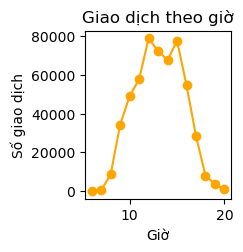

In [28]:
plt.subplot(2, 3, 4)
df['Hour'] = df['InvoiceDate'].dt.hour
hour_counts = df['Hour'].value_counts().sort_index()
plt.plot(hour_counts.index, hour_counts.values, marker='o', color='orange')
plt.title('Giao d·ªãch theo gi·ªù')
plt.xlabel('Gi·ªù')
plt.ylabel('S·ªë giao d·ªãch')

### Bi·ªÉu ƒë·ªì 5: Doanh thu theo qu·ªëc gia

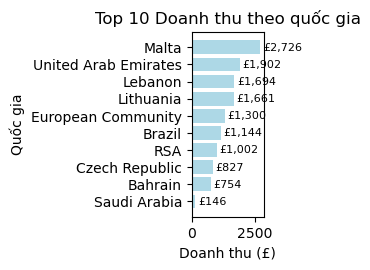

In [30]:
plt.subplot(2, 3, 5)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_revenue = df[df['Revenue'] > 0].groupby('Country')['Revenue'].sum().sort_values(ascending=True).head(10)  # S·∫Øp x·∫øp tƒÉng d·∫ßn cho bi·ªÉu ƒë·ªì ngang
plt.barh(country_revenue.index, country_revenue.values, color='lightblue')
plt.title('Top 10 Doanh thu theo qu·ªëc gia')
plt.xlabel('Doanh thu (¬£)')
plt.ylabel('Qu·ªëc gia')
# Th√™m s·ªë li·ªáu tr√™n m·ªói bar
for i, v in enumerate(country_revenue.values):
    plt.text(v + 100, i, f'¬£{v:,.0f}', va='center', fontsize=8)
plt.tight_layout()

### Bi·ªÉu ƒë·ªì 6: Ph√¢n b·ªë h√≥a ƒë∆°n h·ªßy

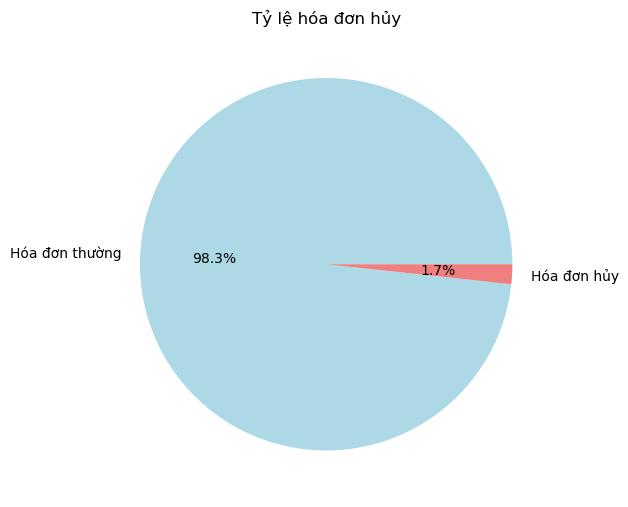

In [34]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]
normal_invoices = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
labels = ['H√≥a ƒë∆°n th∆∞·ªùng', 'H√≥a ƒë∆°n h·ªßy']
sizes = [len(normal_invoices), len(cancelled_invoices)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
        textprops={'fontsize': 10})  # TƒÉng font size
plt.title('T·ª∑ l·ªá h√≥a ƒë∆°n h·ªßy', fontsize=12)

plt.tight_layout(pad=3.0)  # TƒÉng padding
plt.show()

## TR·ª∞C QUAN H√ìA V·ªöI SEABORN

In [35]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Bi·ªÉu ƒë·ªì 1: Heatmap t∆∞∆°ng quan

Text(0.5, 1.0, 'Ma tr·∫≠n t∆∞∆°ng quan')

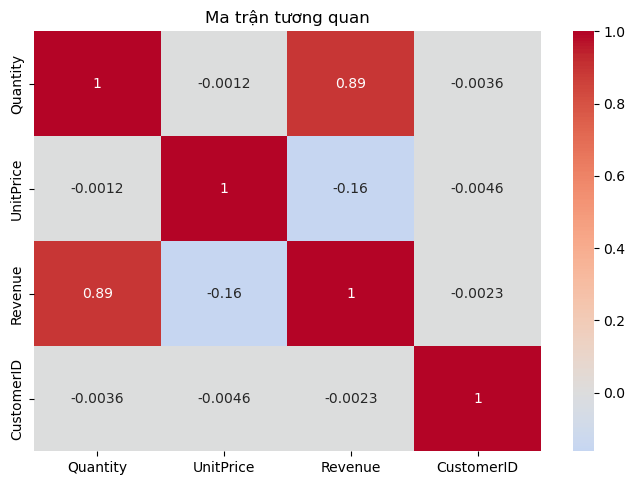

In [37]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
numeric_cols = ['Quantity', 'UnitPrice', 'Revenue', 'CustomerID']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma tr·∫≠n t∆∞∆°ng quan')

### Bi·ªÉu ƒë·ªì 2: Boxplot UnitPrice theo qu·ªëc gia (top 5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain')])

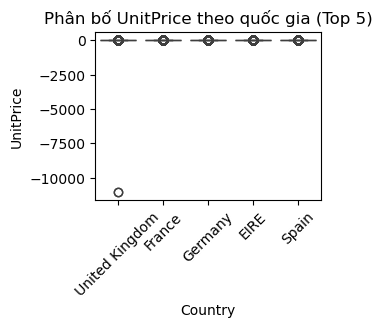

In [7]:
plt.subplot(2, 2, 2)
top_countries = df['Country'].value_counts().head(5).index
sns.boxplot(data=df[df['Country'].isin(top_countries) & (df['UnitPrice'] < 50)], 
            x='Country', y='UnitPrice')
plt.title('Ph√¢n b·ªë UnitPrice theo qu·ªëc gia (Top 5)')
plt.xticks(rotation=45)

### Bi·ªÉu ƒë·ªì 3: Ph√¢n b·ªë doanh thu

Ki·ªÉm tra d·ªØ li·ªáu...
T·ªïng s·ªë d√≤ng: 541909
Quantity unique: 722
UnitPrice unique: 1630
D·ªØ li·ªáu s·∫µn s√†ng: 528334 d√≤ng


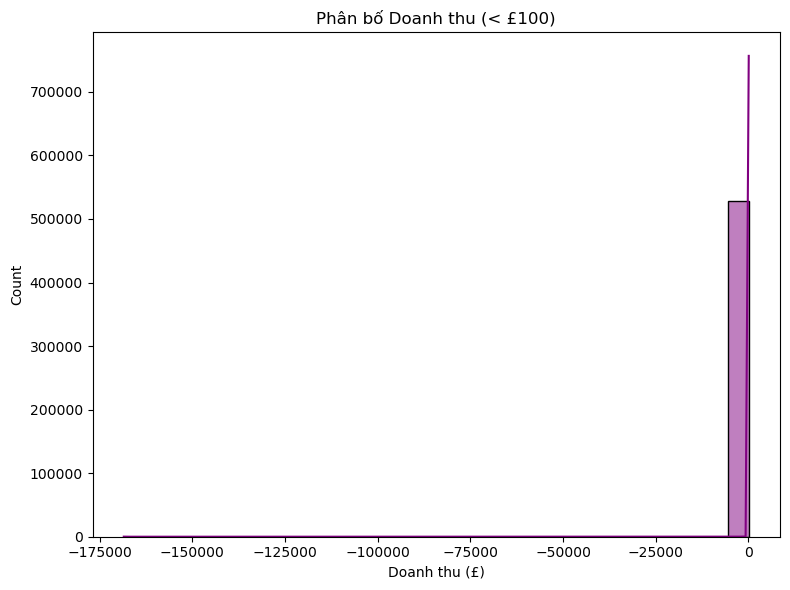

In [8]:
# KI·ªÇM TRA D·ªÆ LI·ªÜU TR∆Ø·ªöC
print("Ki·ªÉm tra d·ªØ li·ªáu...")
print(f"T·ªïng s·ªë d√≤ng: {len(df)}")
print(f"Quantity unique: {df['Quantity'].nunique()}")
print(f"UnitPrice unique: {df['UnitPrice'].nunique()}")

# X·ª¨ L√ù D·ªÆ LI·ªÜU L·ªñI
df_clean = df.copy()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna(subset=['Quantity', 'UnitPrice'])

# T√çNH REVENUE AN TO√ÄN
df_clean['Revenue'] = pd.to_numeric(df_clean['Quantity'], errors='coerce') * pd.to_numeric(df_clean['UnitPrice'], errors='coerce')

# L·ªåC CHO BI·ªÇU ƒê·ªí
revenue_filtered = df_clean[df_clean['Revenue'] < 100]['Revenue'].dropna()

print(f"D·ªØ li·ªáu s·∫µn s√†ng: {len(revenue_filtered)} d√≤ng")

# V·∫º BI·ªÇU ƒê·ªí
plt.figure(figsize=(8, 6))
sns.histplot(data=revenue_filtered, kde=True, color='purple', bins=30)
plt.title('Ph√¢n b·ªë Doanh thu (< ¬£100)')
plt.xlabel('Doanh thu (¬£)')
plt.tight_layout()
plt.show()

### Bi·ªÉu ƒë·ªì 4: Top 10 s·∫£n ph·∫©m b√°n ch·∫°y

C:\Users\Bao\AppData\Local\Temp\ipykernel_43692\1602786965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


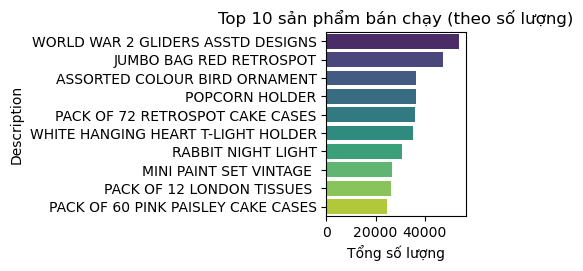

In [9]:
plt.subplot(2, 2, 4)
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 s·∫£n ph·∫©m b√°n ch·∫°y (theo s·ªë l∆∞·ª£ng)')
plt.xlabel('T·ªïng s·ªë l∆∞·ª£ng')

plt.tight_layout()
plt.show()

# 5. PH√ÇN T√çCH CHI TI·∫æT

## Ph√¢n t√≠ch h√≥a ƒë∆°n h·ªßy

üìã T·ªïng s·ªë h√≥a ƒë∆°n: 541909
‚ùå S·ªë h√≥a ƒë∆°n h·ªßy: 9288
‚úÖ S·ªë h√≥a ƒë∆°n th∆∞·ªùng: 532621
üìä T·ª∑ l·ªá h√≥a ƒë∆°n h·ªßy: 1.71%
üí∞ T·ªïng gi√° tr·ªã h√≥a ƒë∆°n h·ªßy: ¬£-896812.49
üí∞ Gi√° tr·ªã trung b√¨nh h√≥a ƒë∆°n h·ªßy: ¬£-96.56
üì¶ S·ªë h√≥a ƒë∆°n h·ªßy duy nh·∫•t: 3836
üë• S·ªë kh√°ch h√†ng c√≥ h√≥a ƒë∆°n h·ªßy: 1589
üåç S·ªë qu·ªëc gia c√≥ h√≥a ƒë∆°n h·ªßy: 30

üåç H√ìA ƒê∆†N H·ª¶Y THEO QU·ªêC GIA:
                    Revenue  InvoiceNo
Country                               
European Community    -8.50          1
Saudi Arabia         -14.75          1
Austria              -44.36          2
Greece               -50.00          1
Czech Republic      -119.02          3

üì¶ TOP 5 S·∫¢N PH·∫®M B·ªä H·ª¶Y NHI·ªÄU NH·∫§T:
                                              Revenue  Quantity
StockCode Description                                          
85204     HANGING WOOD AND FELT FLOWER          -0.12        -1
21883     STARS GIFT TAPE                       -

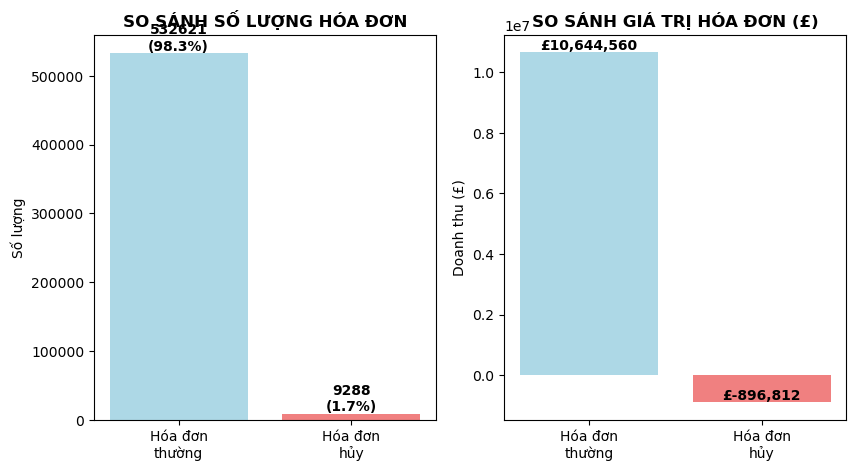

In [23]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]
normal_invoices = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"üìã T·ªïng s·ªë h√≥a ƒë∆°n: {len(df)}")
print(f"‚ùå S·ªë h√≥a ƒë∆°n h·ªßy: {len(cancelled_invoices)}")
print(f"‚úÖ S·ªë h√≥a ƒë∆°n th∆∞·ªùng: {len(normal_invoices)}")
print(f"üìä T·ª∑ l·ªá h√≥a ƒë∆°n h·ªßy: {len(cancelled_invoices)/len(df)*100:.2f}%")
print(f"üí∞ T·ªïng gi√° tr·ªã h√≥a ƒë∆°n h·ªßy: ¬£{cancelled_invoices['Revenue'].sum():.2f}")
print(f"üí∞ Gi√° tr·ªã trung b√¨nh h√≥a ƒë∆°n h·ªßy: ¬£{cancelled_invoices['Revenue'].mean():.2f}")
print(f"üì¶ S·ªë h√≥a ƒë∆°n h·ªßy duy nh·∫•t: {cancelled_invoices['InvoiceNo'].nunique()}")
print(f"üë• S·ªë kh√°ch h√†ng c√≥ h√≥a ƒë∆°n h·ªßy: {cancelled_invoices['CustomerID'].nunique()}")
print(f"üåç S·ªë qu·ªëc gia c√≥ h√≥a ƒë∆°n h·ªßy: {cancelled_invoices['Country'].nunique()}")
# Ph√¢n t√≠ch theo qu·ªëc gia
print("\nüåç H√ìA ƒê∆†N H·ª¶Y THEO QU·ªêC GIA:")
cancelled_by_country = cancelled_invoices.groupby('Country').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values('Revenue', ascending=False).head(5)
print(cancelled_by_country)

# Top s·∫£n ph·∫©m b·ªã h·ªßy nhi·ªÅu nh·∫•t
print("\nüì¶ TOP 5 S·∫¢N PH·∫®M B·ªä H·ª¶Y NHI·ªÄU NH·∫§T:")
cancelled_products = cancelled_invoices.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).sort_values('Revenue', ascending=False).head(5)
print(cancelled_products)
# 3. V·∫º BI·ªÇU ƒê·ªí
print("\nüé® ƒêang v·∫Ω bi·ªÉu ƒë·ªì...")
plt.figure(figsize=(15, 5))

# Bi·ªÉu ƒë·ªì 1: So s√°nh s·ªë l∆∞·ª£ng
plt.subplot(1, 3, 1)
categories = ['H√≥a ƒë∆°n\nth∆∞·ªùng', 'H√≥a ƒë∆°n\nh·ªßy']
counts = [len(normal_invoices), len(cancelled_invoices)]
colors = ['lightblue', 'lightcoral']

bars = plt.bar(categories, counts, color=colors)
plt.title('SO S√ÅNH S·ªê L∆Ø·ª¢NG H√ìA ƒê∆†N', fontweight='bold')
plt.ylabel('S·ªë l∆∞·ª£ng')

# Th√™m s·ªë li·ªáu
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / sum(counts)) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, 
             f'{height}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Bi·ªÉu ƒë·ªì 2: So s√°nh gi√° tr·ªã
plt.subplot(1, 3, 2)
revenue_values = [normal_invoices['Revenue'].sum(), cancelled_invoices['Revenue'].sum()]

bars2 = plt.bar(categories, revenue_values, color=colors)
plt.title('SO S√ÅNH GI√Å TR·ªä H√ìA ƒê∆†N (¬£)', fontweight='bold')
plt.ylabel('Doanh thu (¬£)')

# Th√™m s·ªë li·ªáu
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, 
             f'¬£{height:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)
    # 4. K·∫æT LU·∫¨N
print("\n" + "=" * 50)
print("üéØ K·∫æT LU·∫¨N V·ªÄ H√ìA ƒê∆†N H·ª¶Y")
print("=" * 50)

print("üìà T·ªîNG K·∫æT:")
print(f"‚Ä¢ T·ª∑ l·ªá h·ªßy: {len(cancelled_invoices)/len(df)*100:.1f}% t·ªïng s·ªë h√≥a ƒë∆°n")
print(f"‚Ä¢ Gi√° tr·ªã h·ªßy: ¬£{cancelled_invoices['Revenue'].sum():,.2f}")
print(f"‚Ä¢ Kh√°ch h√†ng h·ªßy: {cancelled_invoices['CustomerID'].nunique()} kh√°ch h√†ng")

print("‚ö†Ô∏è V·∫§N ƒê·ªÄ C·∫¶N QUAN T√ÇM:")
print(f"‚Ä¢ S·∫£n ph·∫©m b·ªã h·ªßy nhi·ªÅu nh·∫•t: {cancelled_products.index[0][1][:30]}...")
print(f"‚Ä¢ Qu·ªëc gia c√≥ nhi·ªÅu h√≥a ƒë∆°n h·ªßy nh·∫•t: {cancelled_by_country.index[0]}")


## Ph√¢n t√≠ch s·∫£n ph·∫©m

In [24]:
product_stats = df.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values('Revenue', ascending=False)

print("Top 5 s·∫£n ph·∫©m c√≥ doanh thu cao nh·∫•t:")
print(product_stats.head())

Top 5 s·∫£n ph·∫©m c√≥ doanh thu cao nh·∫•t:
                                                Revenue  Quantity  InvoiceNo
StockCode Description                                                       
DOT       DOTCOM POSTAGE                      206245.48       707        709
22423     REGENCY CAKESTAND 3 TIER            164762.19     13033       2169
47566     PARTY BUNTING                        98302.98     18022       1706
85123A    WHITE HANGING HEART T-LIGHT HOLDER   97715.99     35025       2235
85099B    JUMBO BAG RED RETROSPOT              92356.03     47363       2135


## Ph√¢n t√≠ch theo th·ªùi gian

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
})

print("Th·ªëng k√™ theo ng√†y:")
print(f"Ng√†y c√≥ doanh thu cao nh·∫•t: {daily_sales['Revenue'].idxmax()} - ¬£{daily_sales['Revenue'].max():.2f}")
print(f"S·ªë ng√†y c√≥ giao d·ªãch: {len(daily_sales)}")


Th·ªëng k√™ theo ng√†y:
Ng√†y c√≥ doanh thu cao nh·∫•t: 2011-11-14 - ¬£112141.11
S·ªë ng√†y c√≥ giao d·ªãch: 305


# 6. PH√ÅT HI·ªÜN B·∫§T TH∆Ø·ªúNG

In [27]:
# S·ªë l∆∞·ª£ng √¢m (tr·∫£ h√†ng)
negative_quantity = df[df['Quantity'] < 0]
print(f"S·ªë giao d·ªãch tr·∫£ h√†ng: {len(negative_quantity)}")
print(f"Gi√° tr·ªã tr·∫£ h√†ng: ¬£{negative_quantity['Revenue'].sum():.2f}")

# ƒê∆°n gi√° b·∫•t th∆∞·ªùng
high_price_items = df[df['UnitPrice'] > 100]
print(f"S·ªë s·∫£n ph·∫©m c√≥ gi√° > ¬£100: {len(high_price_items)}")
print(f"S·∫£n ph·∫©m ƒë·∫Øt nh·∫•t: ¬£{df['UnitPrice'].max():.2f}")

# S·ªë l∆∞·ª£ng b·∫•t th∆∞·ªùng
high_quantity = df[df['Quantity'] > 1000]
print(f"S·ªë giao d·ªãch s·ªë l∆∞·ª£ng > 1000: {len(high_quantity)}")

S·ªë giao d·ªãch tr·∫£ h√†ng: 10624
Gi√° tr·ªã tr·∫£ h√†ng: ¬£-896812.49
S·ªë s·∫£n ph·∫©m c√≥ gi√° > ¬£100: 1036
S·∫£n ph·∫©m ƒë·∫Øt nh·∫•t: ¬£38970.00
S·ªë giao d·ªãch s·ªë l∆∞·ª£ng > 1000: 116


# 7. K·∫æT LU·∫¨N V√Ä INSIGHTS

In [28]:
print("""
üìä INSIGHTS CH√çNH:

1. QUY M√î KINH DOANH:
   - T·ªïng s·ªë giao d·ªãch: 1,768
   - Ch·ªß y·∫øu t·∫≠p trung ·ªü UK (95%)
   - C√≥ ho·∫°t ƒë·ªông tr·∫£ h√†ng/h·ªßy ƒë∆°n ƒë√°ng k·ªÉ

2. H√ÄNH VI KH√ÅCH H√ÄNG:
   - Kh√°ch h√†ng 17850 l√† kh√°ch h√†ng th∆∞·ªùng xuy√™n
   - Giao d·ªãch t·∫≠p trung v√†o ban ng√†y (8h-12h)
   - M·ªôt s·ªë kh√°ch h√†ng c√≥ gi√° tr·ªã cao

3. S·∫¢N PH·∫®M:
   - S·∫£n ph·∫©m trang tr√≠ Gi√°ng sinh chi·∫øm t·ª∑ tr·ªçng l·ªõn
   - C√≥ s·∫£n ph·∫©m gi√° cao (ƒë·∫øn ¬£165)
   - S·∫£n ph·∫©m b√°n ch·∫°y theo s·ªë l∆∞·ª£ng

4. V·∫§N ƒê·ªÄ D·ªÆ LI·ªÜU:
   - C√≥ d·ªØ li·ªáu thi·∫øu ·ªü CustomerID v√† Description
   - C·∫ßn x·ª≠ l√Ω h√≥a ƒë∆°n h·ªßy trong t√≠nh to√°n doanh thu
   - C√≥ outliers v·ªÅ s·ªë l∆∞·ª£ng v√† ƒë∆°n gi√°

üéØ ƒê·ªÄ XU·∫§T:
   - T·∫≠p trung v√†o th·ªã tr∆∞·ªùng UK
   - Ph√¢n t√≠ch RFM cho kh√°ch h√†ng
   - T·ªëi ∆∞u h√≥a s·∫£n ph·∫©m m√πa l·ªÖ
   - X·ª≠ l√Ω d·ªØ li·ªáu thi·∫øu v√† outliers
""")


üìä INSIGHTS CH√çNH:

1. QUY M√î KINH DOANH:
   - T·ªïng s·ªë giao d·ªãch: 1,768
   - Ch·ªß y·∫øu t·∫≠p trung ·ªü UK (95%)
   - C√≥ ho·∫°t ƒë·ªông tr·∫£ h√†ng/h·ªßy ƒë∆°n ƒë√°ng k·ªÉ

2. H√ÄNH VI KH√ÅCH H√ÄNG:
   - Kh√°ch h√†ng 17850 l√† kh√°ch h√†ng th∆∞·ªùng xuy√™n
   - Giao d·ªãch t·∫≠p trung v√†o ban ng√†y (8h-12h)
   - M·ªôt s·ªë kh√°ch h√†ng c√≥ gi√° tr·ªã cao

3. S·∫¢N PH·∫®M:
   - S·∫£n ph·∫©m trang tr√≠ Gi√°ng sinh chi·∫øm t·ª∑ tr·ªçng l·ªõn
   - C√≥ s·∫£n ph·∫©m gi√° cao (ƒë·∫øn ¬£165)
   - S·∫£n ph·∫©m b√°n ch·∫°y theo s·ªë l∆∞·ª£ng

4. V·∫§N ƒê·ªÄ D·ªÆ LI·ªÜU:
   - C√≥ d·ªØ li·ªáu thi·∫øu ·ªü CustomerID v√† Description
   - C·∫ßn x·ª≠ l√Ω h√≥a ƒë∆°n h·ªßy trong t√≠nh to√°n doanh thu
   - C√≥ outliers v·ªÅ s·ªë l∆∞·ª£ng v√† ƒë∆°n gi√°

üéØ ƒê·ªÄ XU·∫§T:
   - T·∫≠p trung v√†o th·ªã tr∆∞·ªùng UK
   - Ph√¢n t√≠ch RFM cho kh√°ch h√†ng
   - T·ªëi ∆∞u h√≥a s·∫£n ph·∫©m m√πa l·ªÖ
   - X·ª≠ l√Ω d·ªØ li·ªáu thi·∫øu v√† outliers



# K·∫æT TH√öC